In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import skew, kurtosis, linregress
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
def plot_montly_sales(data):
    """
    Plots the monthly total sales.
    """
    plt.figure(figsize=(12, 6), dpi=144)
    data.plot(kind='line', marker='o', color='b', linewidth=2)
    plt.title('Monthly Total Sales')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [3]:
def plot_age_distribution():
    """
    Plots a histogram for Age distribution of the dataset
    """
    plt.figure(figsize=(10, 6))
    plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogram: Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [4]:
def plot_sales_by_category(data):
    """
    Plots a bar chart for Sales by Product Category
    """
    plt.figure(figsize=(10, 6), dpi=144)
    data.plot(kind='bar', color='teal', alpha=0.7)
    plt.title('Sales by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()

In [5]:
def plot_gender_distribution(data):
    """
    Plots a pie chart for Customer Distribution by Gender
    """
    plt.figure(figsize=(8, 8))
    data.plot(kind='pie', autopct='%1.1f%%', startangle=90,
              colors=['pink', 'lightblue'], legend=True)
    plt.title('Customer Distribution by Gender')
    plt.ylabel('')
    plt.show()

In [6]:
def plot_amount_by_gender():
    """
    Plots a box plot for Total Amount Distribution by Gender
    """
    plt.figure(figsize=(12, 8))
    sns.boxplot(y=df['Total Amount'], x=df['Gender'], palette="coolwarm")
    plt.title('Total Amount Distribution by Gender')
    plt.suptitle('')
    plt.xlabel('Gender')
    plt.ylabel('Total Amount')
    plt.show()

In [7]:
def statistical_analysis(data):
    """
    Prints Skewness and Kurtosis for Numeric Columns
    """
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        print(f"{column}: Skewness is {skew(data[column].dropna())}")
        print(f"{column}: Kurtosis is {kurtosis(data[column].dropna())}", 
              end='\n\n')
    return

In [8]:
def correlation_analysis(data, method):
    """
    Prints the correlation matrix with different methods
    """
    correlation_matrix = data.corr(method=method, numeric_only=True)
    print(f"{method.capitalize()}'s Correlation Matrix:", end='\n')    
    print(correlation_matrix)
    return

In [9]:
def plot_correlation(data, method):
    """
    Plots correlation of crash data with different methods
    """
    fig, ax = plt.subplots(dpi=144)
    mask = np.triu(np.ones_like(data.corr(numeric_only=True)))
    sns.heatmap(data.corr(numeric_only=True, method=method), ax=ax, 
                vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title(method.capitalize())
    plt.show()
    return

In [10]:
def one_silhoutte_inertia(n, xy):
    """
    Calculates the silhoutte score and WCSS for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_
    return score, inertia

In [11]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red',
               facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

In [12]:
def plot_fitted_price_vs_total(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o',
                   s=1, label='Data')
    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap, marker='x',
               s=100, label='Estimated Centres')
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('Customers Age')
    ax.set_ylabel('Total Amount')
    plt.show()
    return

In [13]:
def fit_line(x, y):
    """
    Fits a line to the given data points.
    """
    slope, intercept, slope_stderr, intercept_stderr, _ = linregress(x, y)
    return slope, intercept, slope_stderr, intercept_stderr

In [69]:
def plot_line_fit(x, y, slope, intercept, slope_stderr, intercept_stderr):
    """
    Plots the original data points along with the fitted line and confidence 
    intervals.
    """
    # Predicted values
    y_pred = slope * x + intercept

    # Plot data and the linear fit
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, marker='x', label='Store Data')
    plt.plot(x, y_pred, color='red', label='Fitted Line')

    # Standard error of prediction
    pred_stderr = np.sqrt(np.sum((y - y_pred)**2) / (len(y) - 2))
    ci = 1.96 * pred_stderr * np.sqrt(1/len(x) + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    plt.fill_between(x, y_pred - ci, y_pred + ci, color='gray', alpha=0.5, label='95% Confidence Interval')

    plt.xlabel('Age')
    plt.ylabel('Total Amount')
    plt.title('Fitted Line with Confidence Interval')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [15]:
def polynomial_fitting(X, y, degree=2):
    """
    This function performs polynomial fitting on the data.
    """
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model

In [44]:
def exponential_func(X, a, b):
    """
    This function calculates the value of an exponential function
    for a given X.
    """
    #     return a * np.exp(b * x) + c
    return a * np.exp(b * X)

In [41]:
def exponential_fitting(X, y):
    """
    This function performs exponential fitting on the data.
    """
    #     params, _ = curve_fit(exponential_func, X.flatten(), y)
    #     return params
    """
    Fits an exponential model by linearizing it and using linear regression.
    """
    y_transformed = np.log(y)
    model = LinearRegression()
    model.fit(X, y_transformed)
    return (np.exp(model.intercept_), model.coef_[0])

In [63]:
def plot_fittings(X, y, X_plot, poly_model, exp_params, degree):
    """
    This function plots polynomial and exponential fittings on the data.
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, marker='s', s=10, color='magenta', label='Retail Store Data')
    
    # Plot polynomial fit
    plt.plot(X_plot, poly_model.predict(PolynomialFeatures(degree=degree).fit_transform(X_plot)), 
             color='red', label='Polynomial Fit')
    
    # Plot exponential fit
    plt.plot(X_plot, exponential_func(X_plot, *exp_params),
             color='green', label='Exponential Fit')
    
    plt.xlabel('Age')
    plt.ylabel('Total Amount')
    plt.title('Polynomial and Exponential Fitting')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [19]:
df = pd.read_csv('retail_sales_dataset.csv', index_col='Date', parse_dates=['Date']).dropna()
df.head(), df.dtypes

(            Transaction ID Customer ID  Gender  Age Product Category  \
 Date                                                                   
 2023-11-24               1     CUST001    Male   34           Beauty   
 2023-02-27               2     CUST002  Female   26         Clothing   
 2023-01-13               3     CUST003    Male   50      Electronics   
 2023-05-21               4     CUST004    Male   37         Clothing   
 2023-05-06               5     CUST005    Male   30           Beauty   
 
             Quantity  Price per Unit  Total Amount  
 Date                                                
 2023-11-24         3              50           150  
 2023-02-27         2             500          1000  
 2023-01-13         1              30            30  
 2023-05-21         1             500           500  
 2023-05-06         2              50           100  ,
 Transaction ID       int64
 Customer ID         object
 Gender              object
 Age                  in

In [20]:
df = df.drop(['Transaction ID', 'Customer ID'], axis=1)

In [21]:
df.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [22]:
df.std(numeric_only=True)

Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64

### Relational Graph

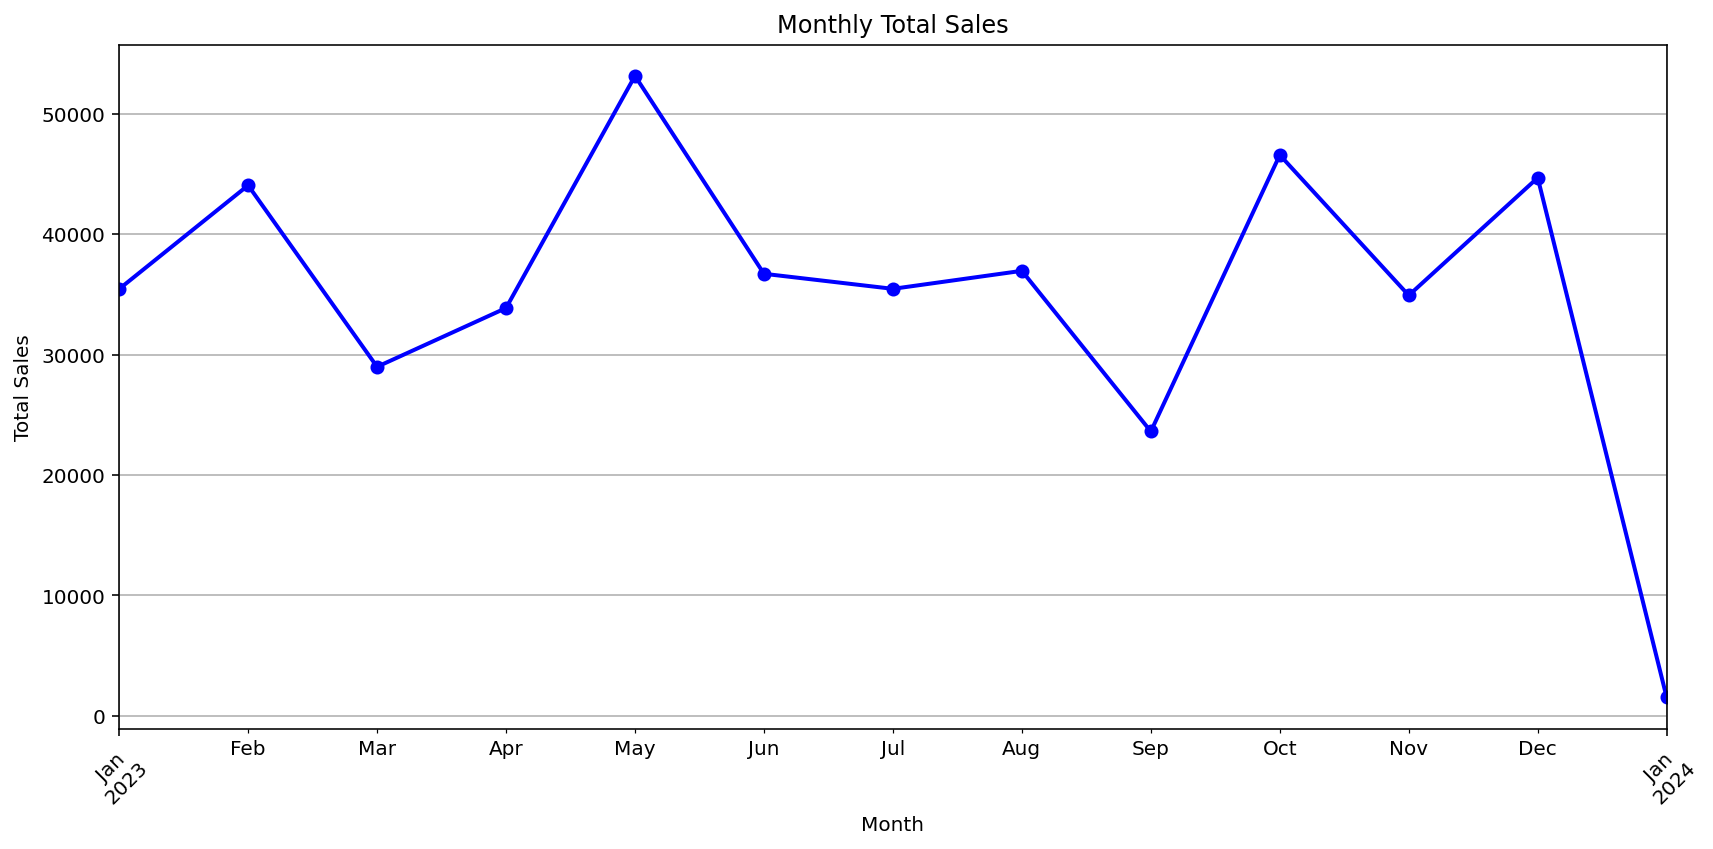

In [23]:
# Resample 'Total Amount' to monthly totals using the new DataFrame index
monthly_total_sales = df['Total Amount'].resample('M').sum()

plot_montly_sales(monthly_total_sales)

### Categorical Graphs

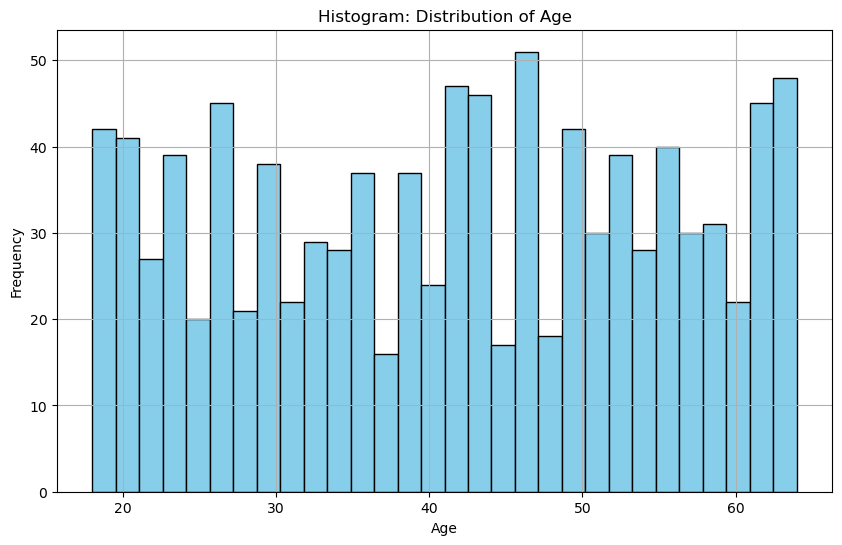

In [24]:
plot_age_distribution()

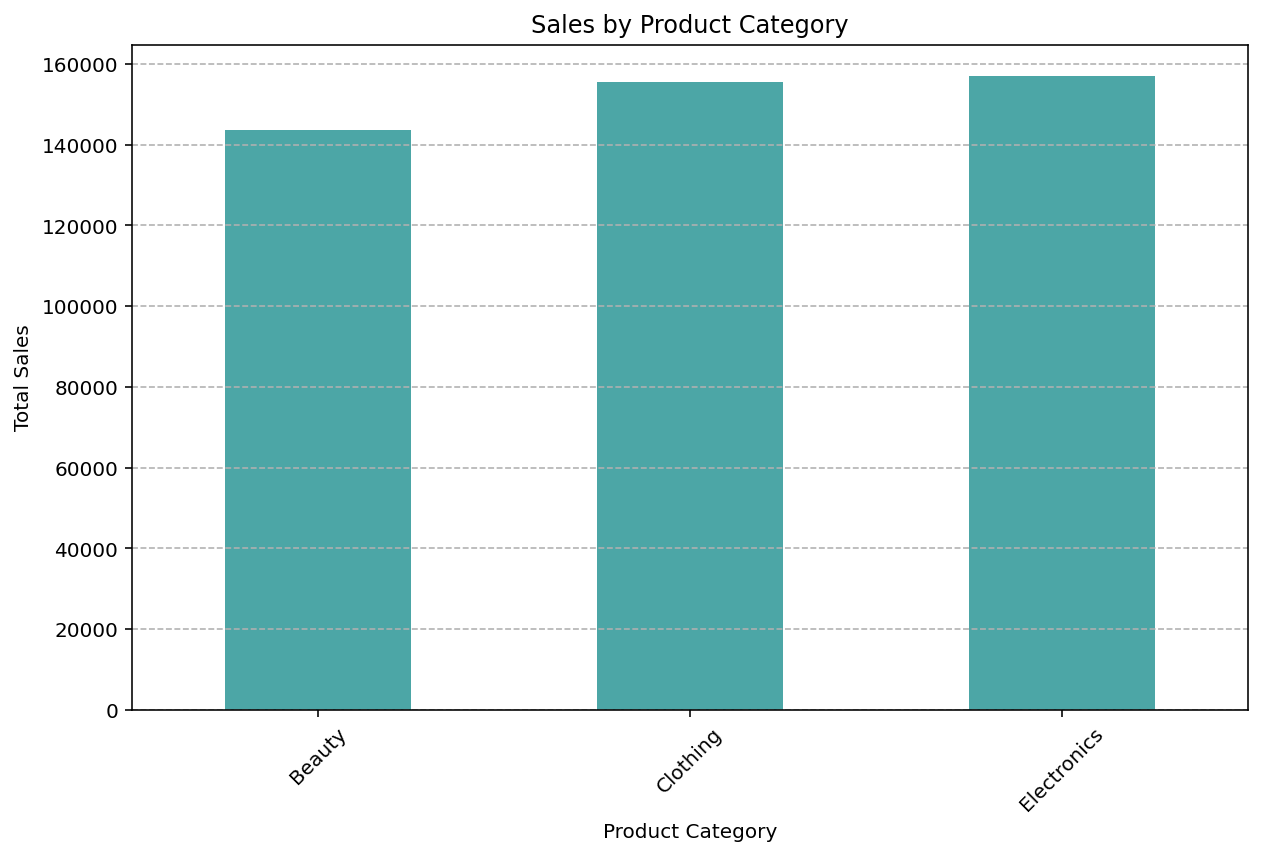

In [25]:
# Calculate total sales by product category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()

plot_sales_by_category(sales_by_category)

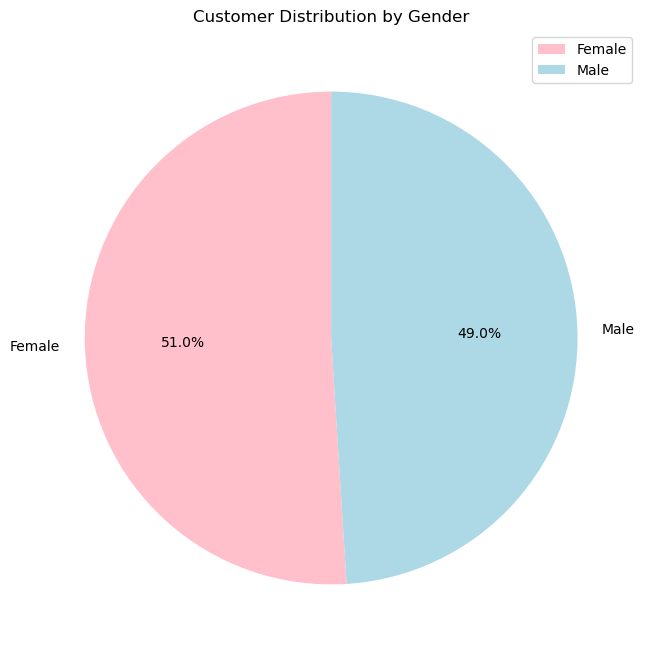

In [26]:
# Calculate customer distribution by gender
gender_distribution = df['Gender'].value_counts()

plot_gender_distribution(gender_distribution)

### Statistical Graphs

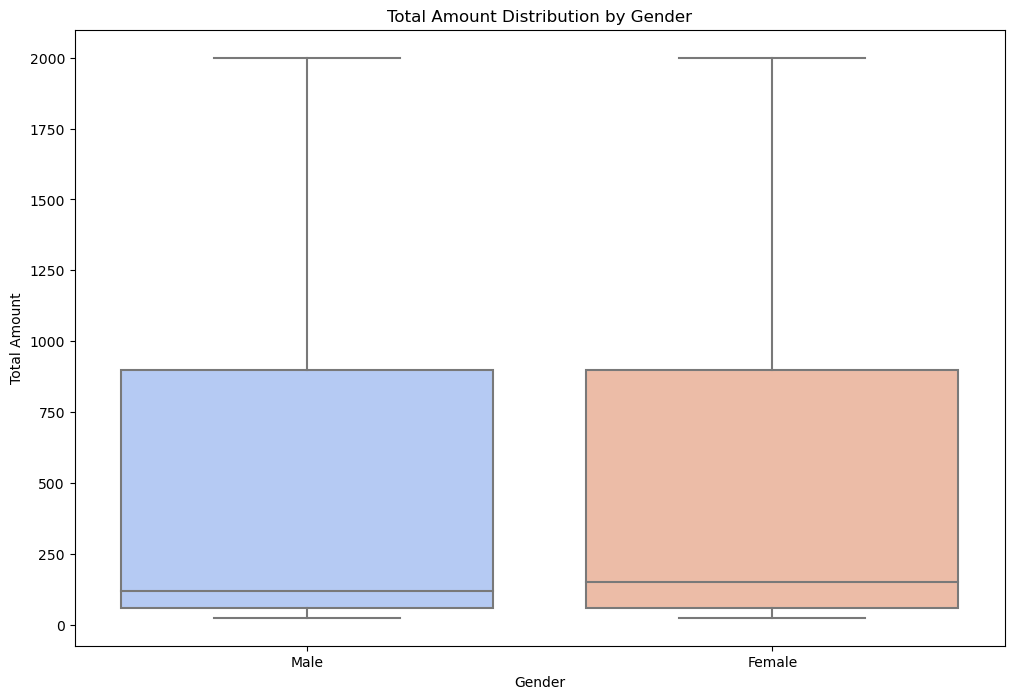

In [27]:
plot_amount_by_gender()

Viewing some more statistics

In [28]:
statistical_analysis(df)

Age: Skewness is -0.048739204593428495
Age: Kurtosis is -1.2012082655112208

Quantity: Skewness is -0.0140147947650473
Quantity: Kurtosis is -1.39190690704194

Price per Unit: Skewness is 0.7352028558846894
Price per Unit: Kurtosis is -1.139303485365681

Total Amount: Skewness is 1.3740631909684091
Total Amount: Kurtosis is 0.8049678933219302



Pearson's Correlation Matrix:
                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


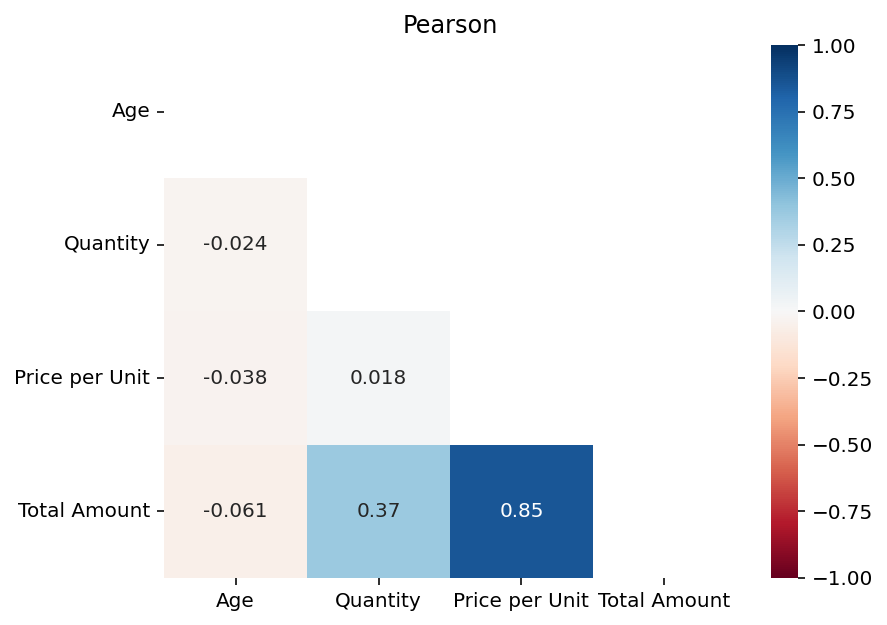

Kendall's Correlation Matrix:
                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.017853       -0.027979     -0.026288
Quantity       -0.017853  1.000000        0.019210      0.401932
Price per Unit -0.027979  0.019210        1.000000      0.724707
Total Amount   -0.026288  0.401932        0.724707      1.000000


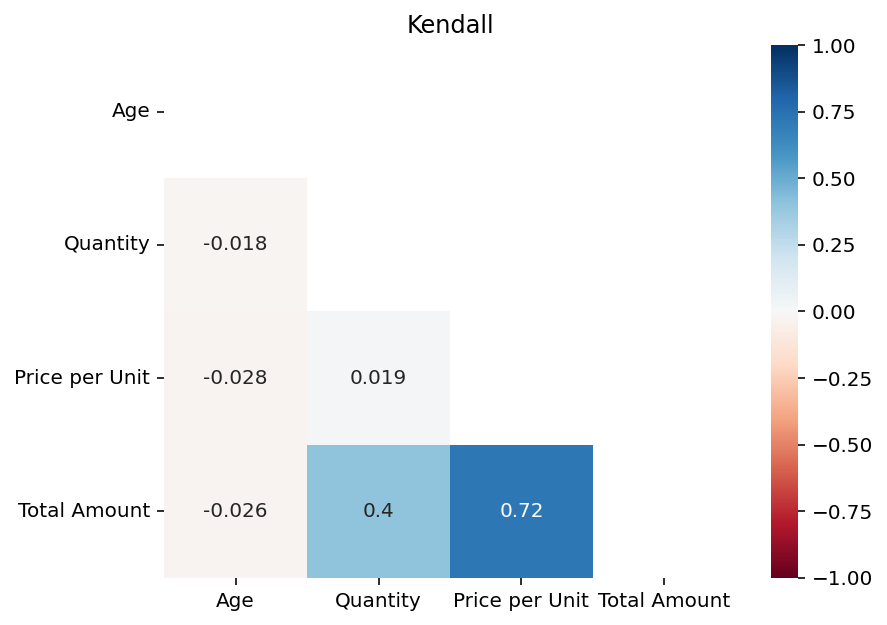

In [29]:
corr_methods = ['pearson', 'kendall']

for method in corr_methods:
    correlation_analysis(df, method)
    plot_correlation(df, method)

/Users/miyachi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


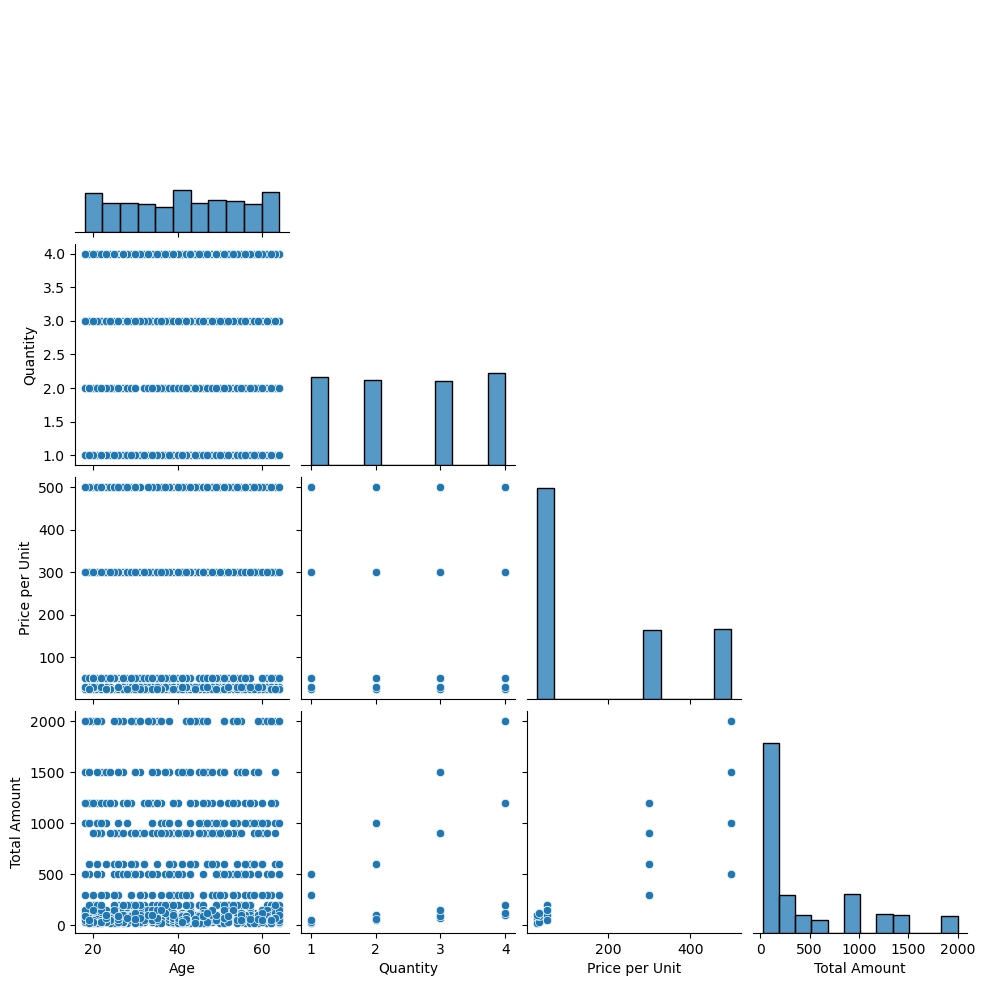

In [30]:
df = df.drop(['Gender', 'Product Category'], axis=1)

for col in df.columns:
    df[col] = pd.to_numeric(df[col])

sns.pairplot(df, corner=True)
plt.show()

### Clustering

In [31]:
df_clust = df[['Age', 'Total Amount']].copy()
scaler = RobustScaler()
norm = scaler.fit_transform(df_clust)

 2 clusters silhoutte score = 0.50
 3 clusters silhoutte score = 0.48
 4 clusters silhoutte score = 0.50
 5 clusters silhoutte score = 0.45
 6 clusters silhoutte score = 0.46
 7 clusters silhoutte score = 0.46
 8 clusters silhoutte score = 0.43
 9 clusters silhoutte score = 0.44
10 clusters silhoutte score = 0.43
Best number of clusters =  2


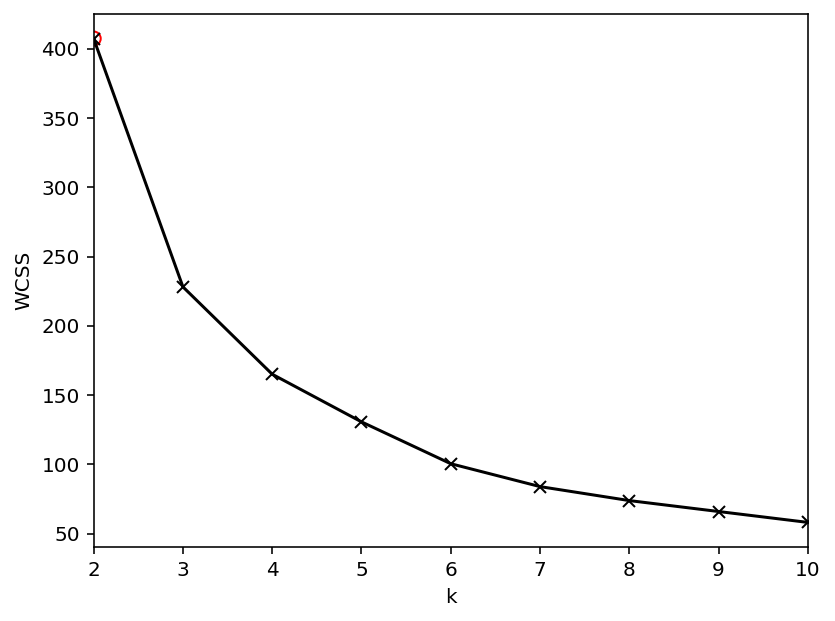

In [32]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11): # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")
print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)


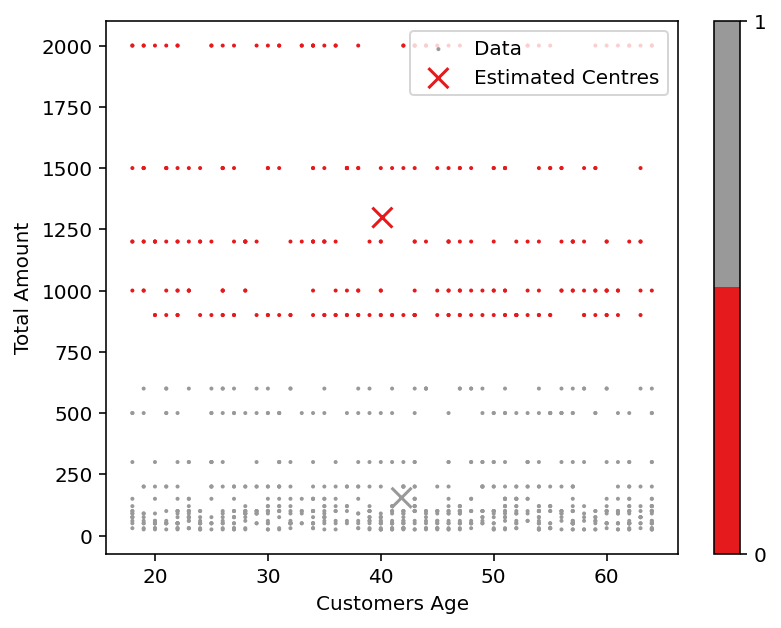

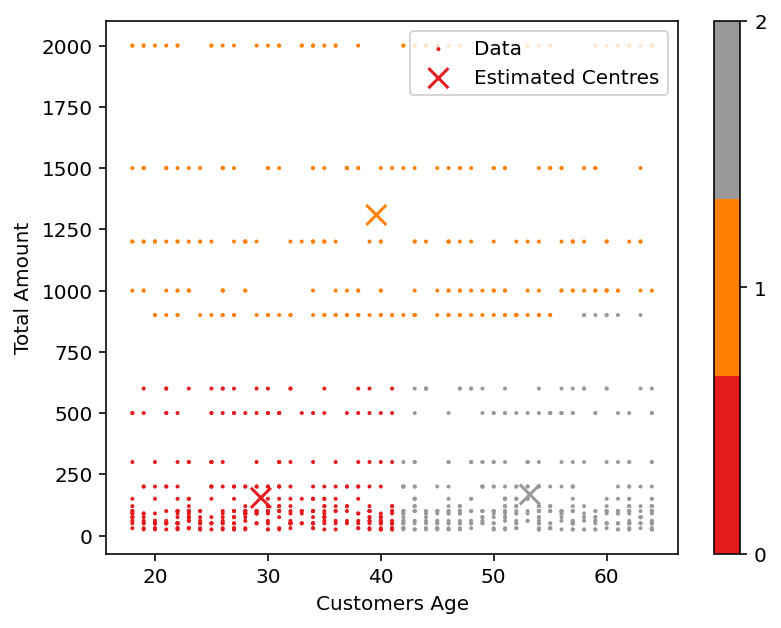

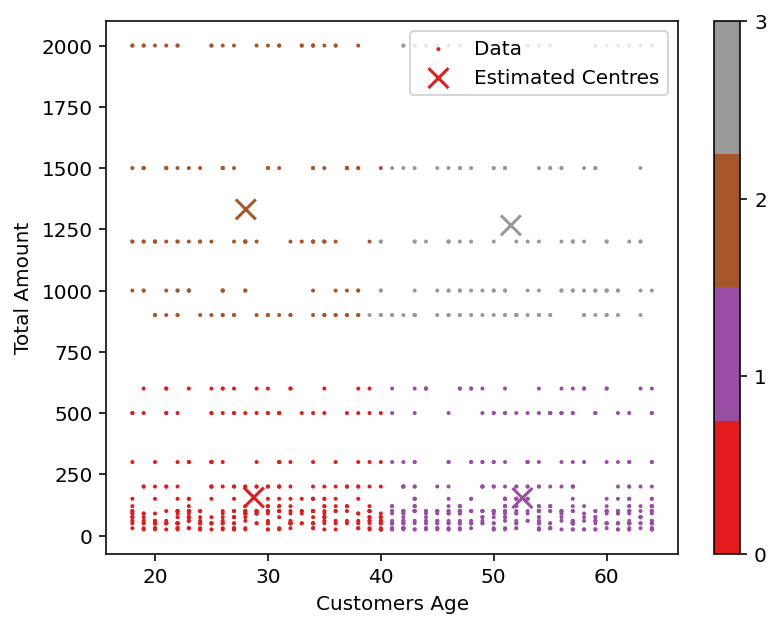

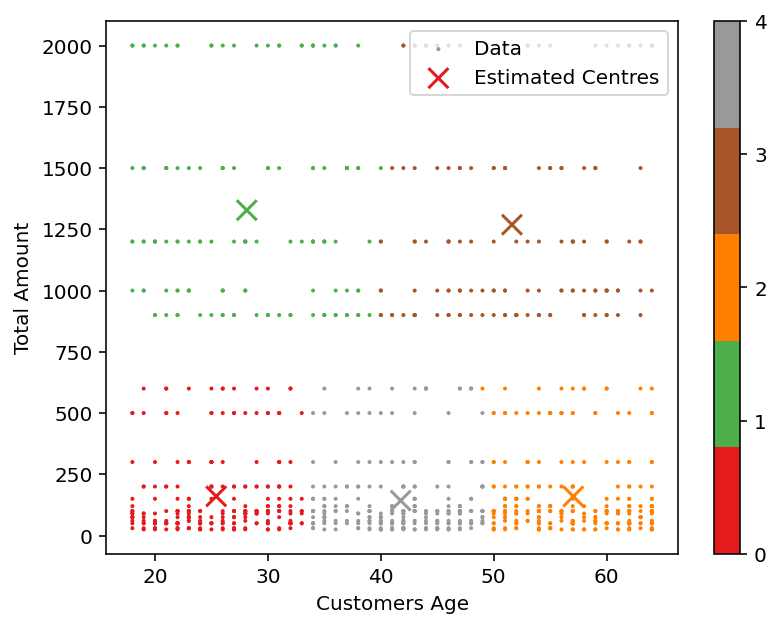

In [33]:
inv_norm = scaler.inverse_transform(norm)
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)
    labels = kmeans.labels_
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_fitted_price_vs_total(labels, inv_norm, xkmeans, ykmeans, cenlabels)

4 clusters seem appropriate.

### Fitting

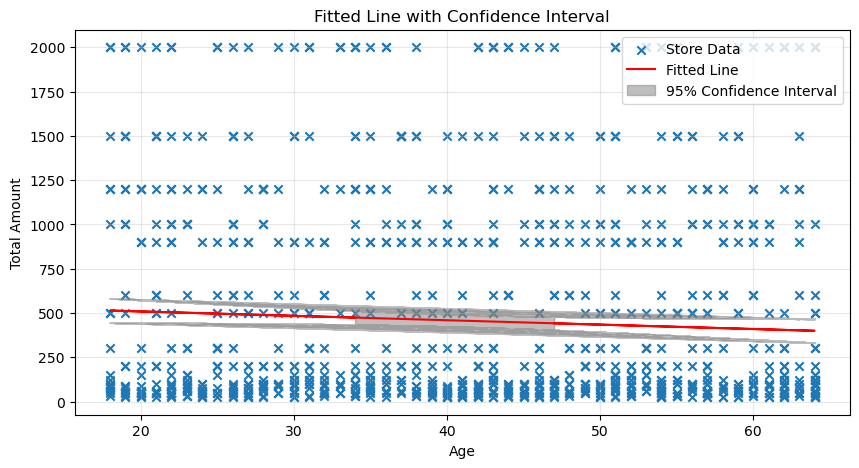

In [70]:
x = df['Age'].values
y = df['Total Amount'].values

slope, intercept, slope_stderr, intercept_stderr = fit_line(x, y)
plot_line_fit(x, y, slope, intercept, slope_stderr, intercept_stderr)

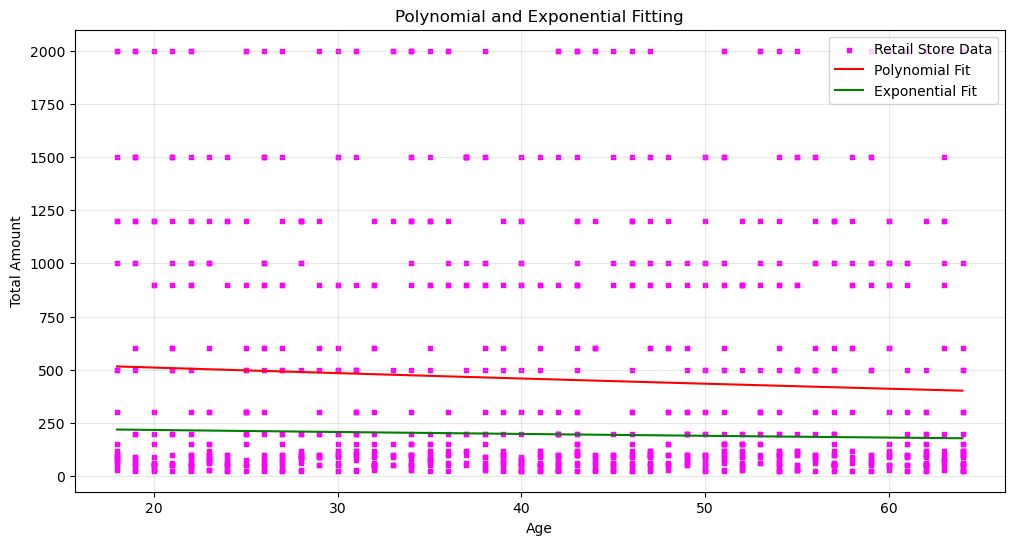

In [65]:
X = df[['Age']].values
y = df['Total Amount'].values
X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)

# Perform polynomial fitting
degree = 2
poly_model = polynomial_fitting(X, y, degree)

# Perform exponential fitting
exp_params = exponential_fitting(X, y)

plot_fittings(X, y, X_plot, poly_model, exp_params, degree)